# uma8_collected_patterns_1.ipynb

This notebook was used to collect the raw signals to be used for determining 
what the actual array pattern looks like. Three runs were taken from the following 
constrained setup (1m radius, UMA-8 approximately place 0.6m away from the sides, 
of the table, edges and corners of the table used to orient myself with more 
consistency) depicted below.

![photo](IMG_0117.jpg)

![diagram](IMG_0119.jpg)

In [4]:
import pyaudio
import numpy as np
from matplotlib import pyplot as plt

listener = pyaudio.PyAudio()

n_apis = listener.get_host_api_count()
apis = []
for i_api in range(n_apis):
    api = listener.get_host_api_info_by_index(i_api)
    apis.append(api['name'])

i_uma8 = None
n_devices = listener.get_device_count()
for i_device in range(n_devices):
    device = listener.get_device_info_by_index(i_device)
    if 'micArray RAW SPK: USB Audio' in device['name']:
        i_uma8 = i_device

if i_uma8 is None:
    raise print('UMA8 not found')
else:
    print(f'UMA8 found at index {i_uma8}')

UMA8 found at index 7


Recording started... Recording stopped.


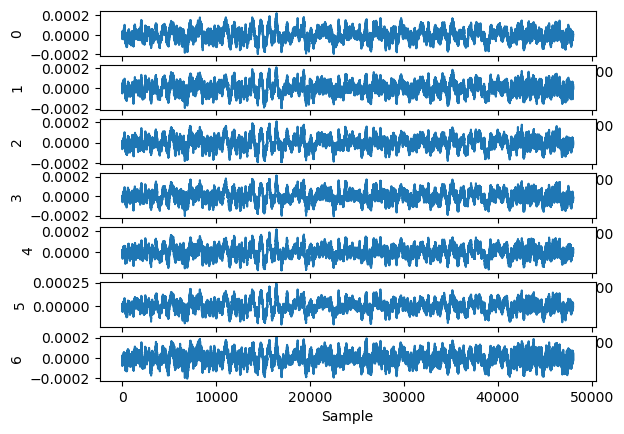

In [2]:
def record(n_samples=44100*180): # 180 seconds per recording by default
    stream = listener.open(
        rate=44100,
        channels=8,
        format=pyaudio.paFloat32,
        input=True,
        input_device_index=i_device,
        frames_per_buffer=128
    )
    stream.read(1024) # discard first buffer

    print('Recording started...', end=' ')

    buffer = stream.read(n_samples)
    stream.stop_stream()
    stream.close()

    print('Recording stopped.')

    data = np.frombuffer(buffer, dtype=np.float32)
    data = data.reshape((n_samples, 8))[:, :7] # discard last channel
    return data

def plot(data):
    plt.subplot(7, 1, 1)
    for i_channel in range(7):
        plt.subplot(7, 1, i_channel+1)
        plt.plot(data[:, i_channel])
        plt.ylabel(f'{i_channel}')
    plt.xlabel('Sample')
    plt.show()

test_data = record(44100*1)
plot(test_data)

Recording started... Recording stopped.


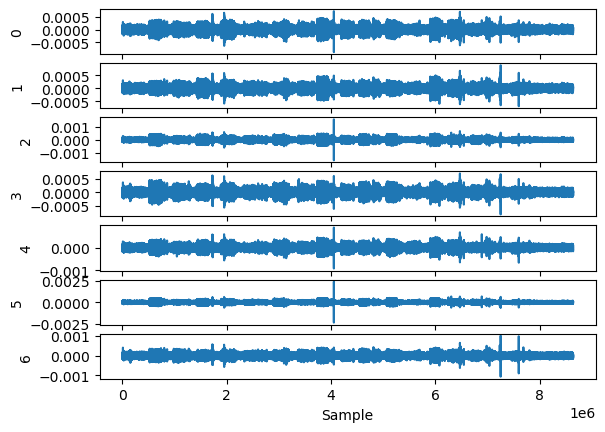

In [4]:
# 700 Hz, single source

data = record()
np.save('raw_1.npy', data)
plot(data)

Recording started... Recording stopped.


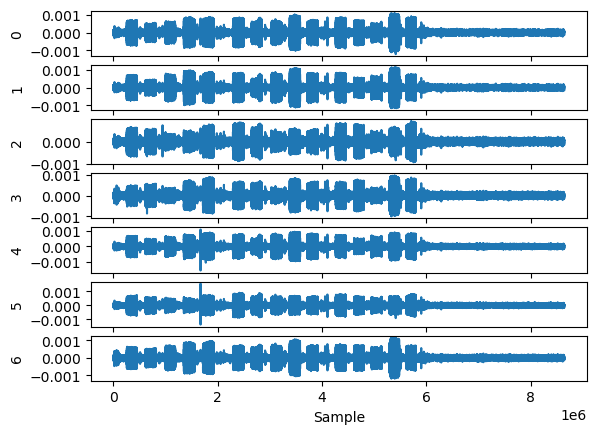

In [6]:
# 1400 Hz, single source

data = record()
np.save('raw_2.npy', data)
plot(data)

Recording started... Recording stopped.


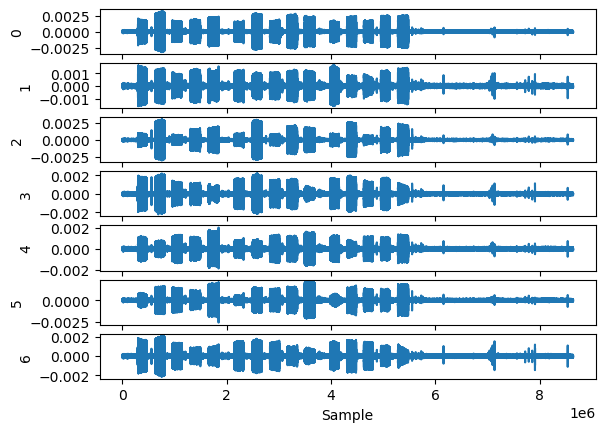

In [3]:
# 2800 Hz, single source

data = record()
np.save('raw_3.npy', data)
plot(data)

Recording started... Recording stopped.


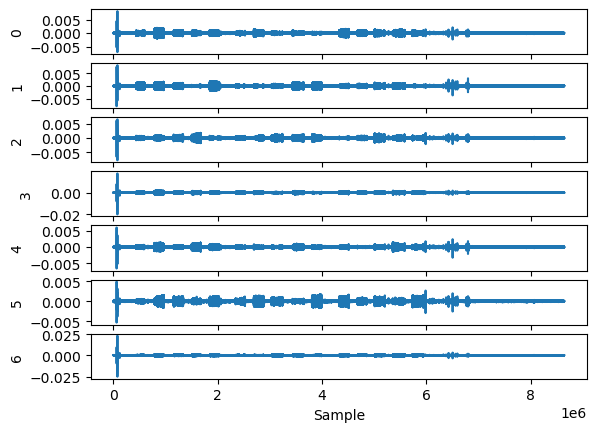

In [3]:
# 5600 Hz, single source

data = record()
np.save('raw_4.npy', data)
plot(data)